# Titanic Dataset Statistical Analysis Exercises

This notebook contains solutions to statistical analysis exercises using the Titanic dataset. The exercises explore correlations, survival patterns, and data reconstruction techniques.

## Data Loading and Exploration

First, let's load the dataset and understand its structure.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set style for better plots
plt.style.use('default')
sns.set_palette('husl')

# Load the dataset
df = pd.read_csv('./titanic.csv')

print('Dataset shape:', df.shape)
print('\nColumn information:')
print(df.info())
print('\nFirst few rows:')
df.head()

Dataset shape: (891, 12)

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First few rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
# Check for missing values
print('Missing values per column:')
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

print('\nBasic statistics:')
df.describe()

Missing values per column:
Age         177
Cabin       687
Embarked      2
dtype: int64

Basic statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exercise 1: Age vs Family Size Correlation

**Question:** Check if there is a correlation between age and the number of family members on board (SibSp + Parch), and whether older people tended to travel alone.

In [ ]:
# Create family size variable
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

# Remove rows with missing age for this analysis
age_data = df.dropna(subset=['Age'])

print(f'Original dataset: {len(df)} passengers')
print(f'With age data: {len(age_data)} passengers')
print('Family size distribution:')
print(df['FamilySize'].value_counts().sort_index())

print(f'\nPercentage traveling alone: {df["IsAlone"].mean()*100:.1f}%')

Original dataset: 891 passengers
With age data: 714 passengers

Family size distribution:
FamilySize
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64

Percentage traveling alone: 60.3%


Correlation between Age and Family Size: -0.3019


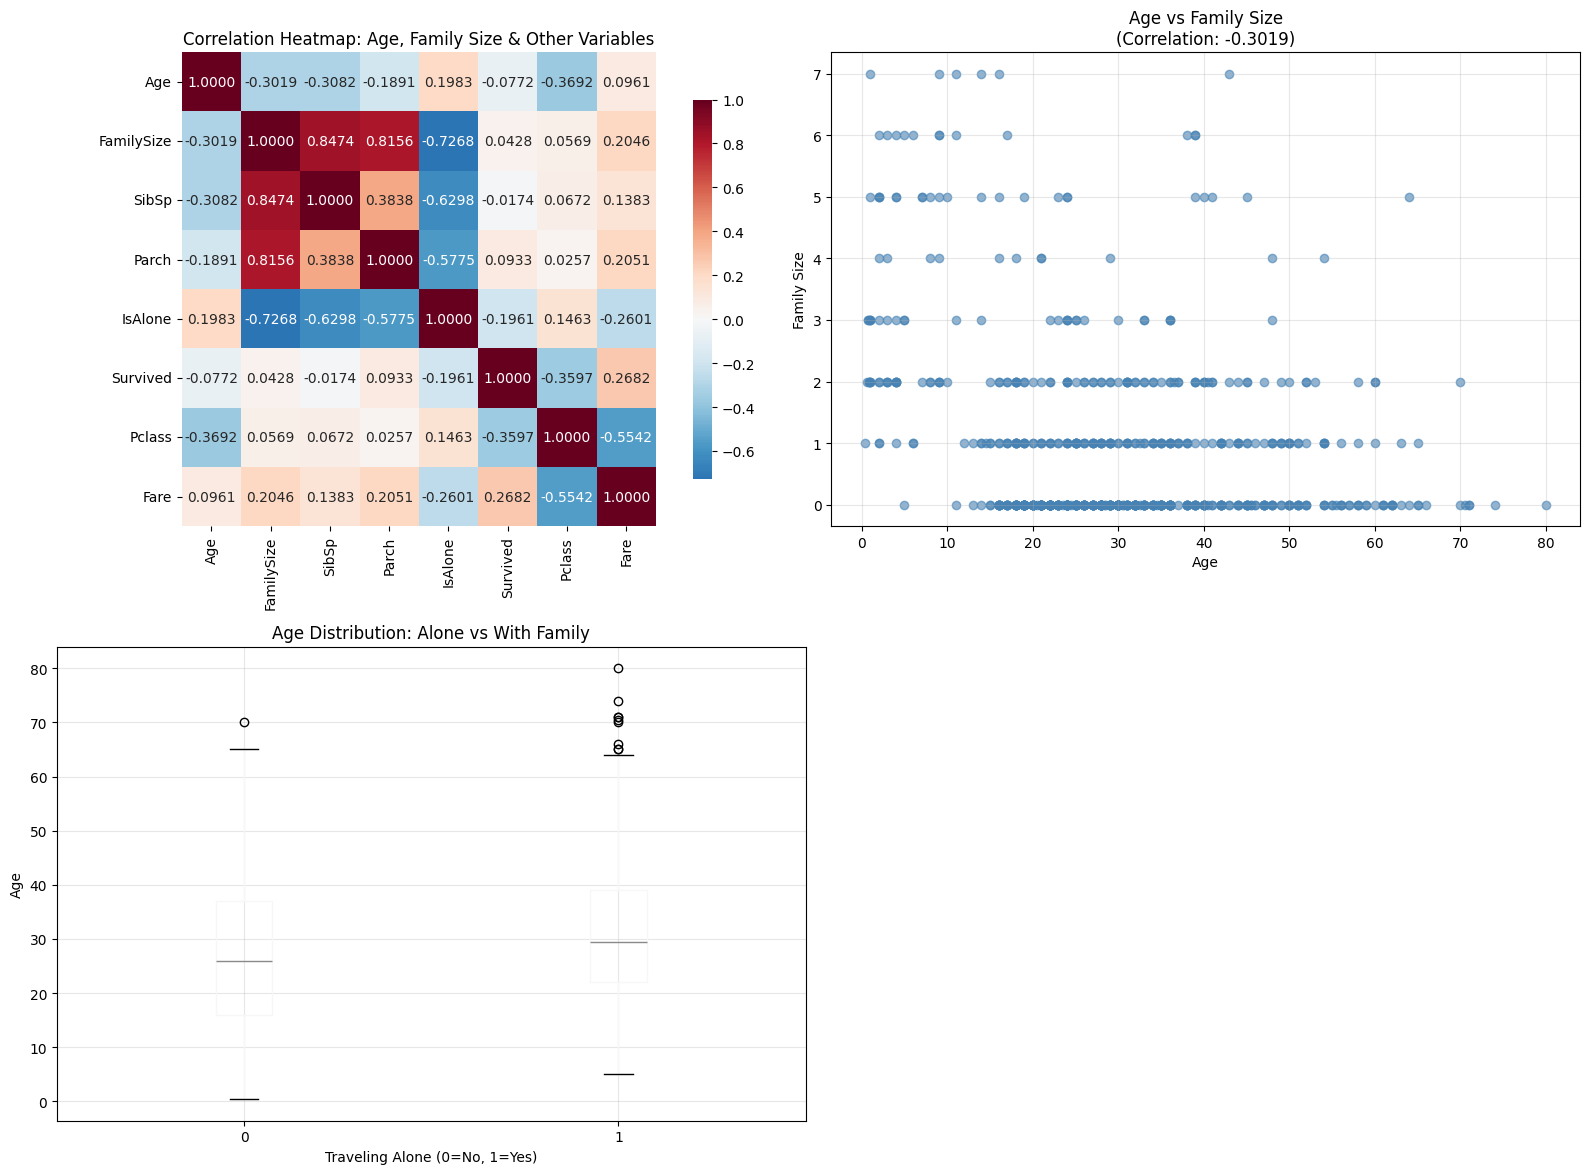

In [85]:
# Calculate correlation between age and family size
correlation = age_data['Age'].corr(age_data['FamilySize'])
print(f'Correlation between Age and Family Size: {correlation:.4f}')

# Create correlation heatmap
plt.figure(figsize=(16, 12))

# Create correlation matrix for relevant variables
corr_vars = ['Age', 'FamilySize', 'SibSp', 'Parch', 'IsAlone', 'Survived', 'Pclass', 'Fare']
corr_matrix = age_data[corr_vars].corr()

# Create heatmap
plt.subplot(2, 2, 1)
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, square=True, 
            fmt='.4f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap: Age, Family Size & Other Variables')

# Scatter plot
plt.subplot(2, 2, 2)
plt.scatter(age_data['Age'], age_data['FamilySize'], alpha=0.6, color='steelblue')
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title(f'Age vs Family Size\n(Correlation: {correlation:.4f})')
plt.grid(True, alpha=0.3)

# Box plot showing age distribution by traveling alone status
plt.subplot(2, 2, 3)
age_data.boxplot(column='Age', by='IsAlone', ax=plt.gca())
plt.xlabel('Traveling Alone (0=No, 1=Yes)')
plt.ylabel('Age')
plt.title('Age Distribution: Alone vs With Family')
plt.grid(True, alpha=0.3)
plt.suptitle('')

plt.tight_layout()
plt.show()

Percentage traveling alone by age group:
             Percent_Alone  Count
AgeGroup                         
Child            25.899281    139
Young Adult      69.259259    270
Adult            57.261411    241
Senior           67.187500     64

Average age - Traveling alone: 32.2
Average age - With family: 26.4
Difference: 5.8 years


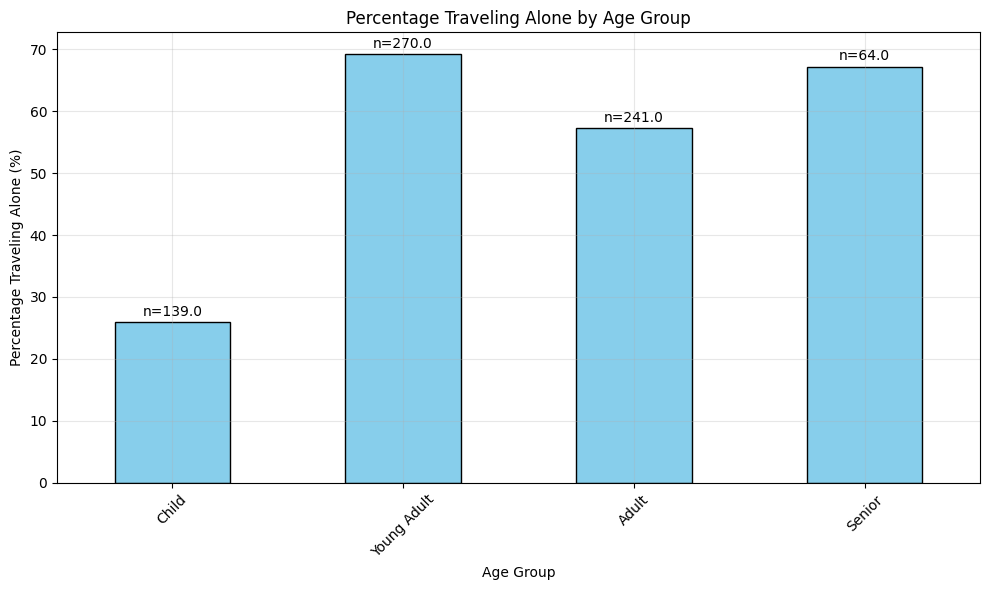

In [86]:
# Analyze age groups and traveling alone patterns
age_data = age_data.copy()  # Fix SettingWithCopyWarning
age_data['AgeGroup'] = pd.cut(age_data['Age'], bins=[0, 18, 30, 50, 80], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

alone_by_age = age_data.groupby('AgeGroup', observed=True)['IsAlone'].agg(['mean', 'count'])  # Fix FutureWarning
alone_by_age.columns = ['Percent_Alone', 'Count']
alone_by_age['Percent_Alone'] *= 100

print('Percentage traveling alone by age group:')
print(alone_by_age)

# Statistical comparison
alone_ages = age_data[age_data['IsAlone'] == 1]['Age']
with_family_ages = age_data[age_data['IsAlone'] == 0]['Age']

print(f'\nAverage age - Traveling alone: {alone_ages.mean():.1f}')
print(f'Average age - With family: {with_family_ages.mean():.1f}')
print(f'Difference: {alone_ages.mean() - with_family_ages.mean():.1f} years')

# Create bar plot
plt.figure(figsize=(10, 6))
alone_by_age['Percent_Alone'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage Traveling Alone by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage Traveling Alone (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add count labels on bars
for i, (idx, row) in enumerate(alone_by_age.iterrows()):
    plt.text(i, row['Percent_Alone'] + 1, f'n={row["Count"]}', ha='center')

plt.tight_layout()
plt.show()

## Exercise 2: Gender vs Survival Analysis

**Question:** Check if there is a relationship between gender (Sex) and survival, and explain why the result is historically and statistically important.

In [87]:
# Create cross-tabulation of gender and survival
gender_survival = pd.crosstab(df['Sex'], df['Survived'], margins=True)
print('Cross-tabulation: Gender vs Survival')
print(gender_survival)
print()

# Calculate survival rates by gender
survival_rates = df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
survival_rates.columns = ['Total', 'Survived', 'Survival_Rate']
survival_rates['Survival_Rate'] *= 100

print('Survival rates by gender:')
print(survival_rates)

# Calculate the difference in survival rates
female_rate = survival_rates.loc['female', 'Survival_Rate']
male_rate = survival_rates.loc['male', 'Survival_Rate']
difference = female_rate - male_rate

print(f'\nFemale survival rate: {female_rate:.1f}%')
print(f'Male survival rate: {male_rate:.1f}%')
print(f'Difference: {difference:.1f} percentage points')
print(f'Female survival rate is {female_rate/male_rate:.1f}x higher than male survival rate')

Cross-tabulation: Gender vs Survival
Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891

Survival rates by gender:
        Total  Survived  Survival_Rate
Sex                                   
female    314       233      74.203822
male      577       109      18.890815

Female survival rate: 74.2%
Male survival rate: 18.9%
Difference: 55.3 percentage points
Female survival rate is 3.9x higher than male survival rate


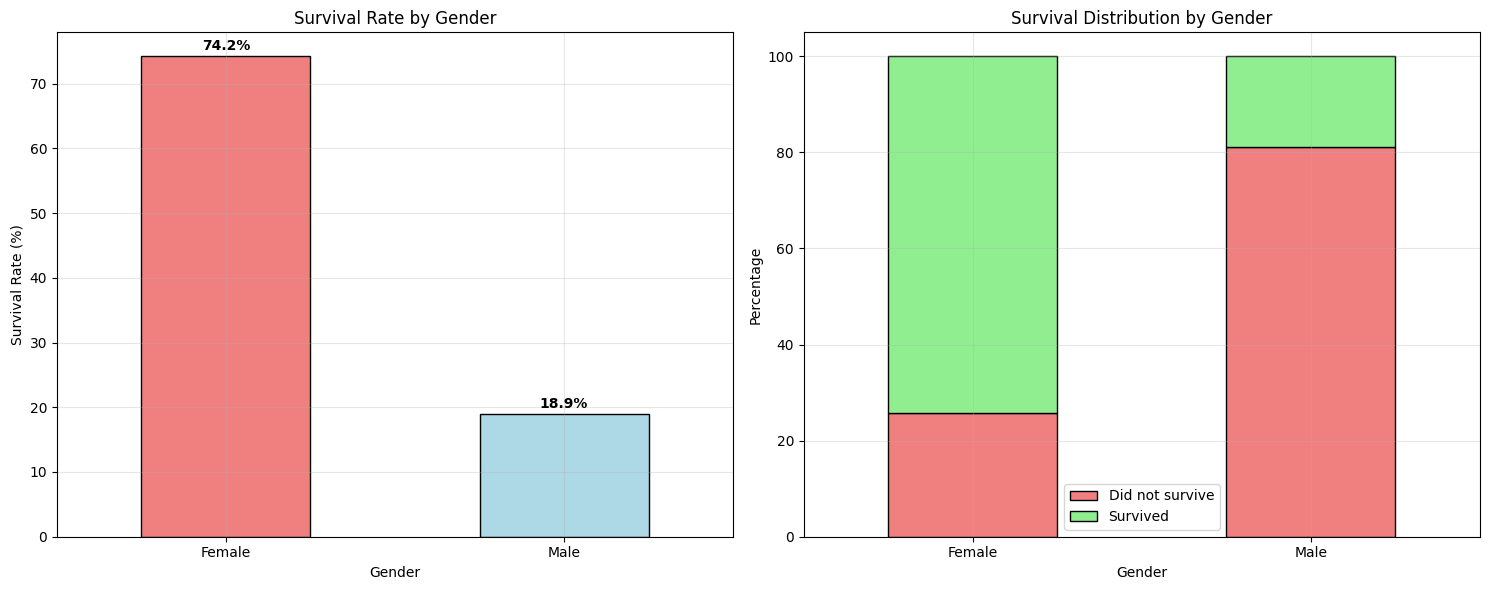

In [88]:
# Visualization of survival by gender
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot of survival rates
survival_rates['Survival_Rate'].plot(kind='bar', ax=ax1, color=['lightcoral', 'lightblue'], edgecolor='black')
ax1.set_title('Survival Rate by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Survival Rate (%)')
ax1.set_xticklabels(['Female', 'Male'], rotation=0)
ax1.grid(True, alpha=0.3)

# Add percentage labels on bars
for i, rate in enumerate(survival_rates['Survival_Rate']):
    ax1.text(i, rate + 1, f'{rate:.1f}%', ha='center', fontweight='bold')

# Stacked bar chart showing counts
gender_survival_pct = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
gender_survival_pct.plot(kind='bar', stacked=True, ax=ax2, 
                        color=['lightcoral', 'lightgreen'], edgecolor='black')
ax2.set_title('Survival Distribution by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Percentage')
ax2.set_xticklabels(['Female', 'Male'], rotation=0)
ax2.legend(['Did not survive', 'Survived'])
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Why This Result is Historically and Statistically Important

**Historical Importance:**
1. **"Women and Children First" Protocol**: The Titanic disaster famously followed the maritime "women and children first" evacuation protocol. This was a social norm of the early 20th century.
2. **Social Class and Gender Intersections**: The survival patterns reflect not just gender differences, but also how social expectations and class distinctions played out during the disaster.
3. **Maritime Safety Influence**: This disaster led to major changes in maritime safety regulations, including sufficient lifeboats for all passengers.

**Statistical Importance:**
1. **Large Effect Size**: The ~55 percentage point difference between male and female survival rates represents a very large effect size in statistical terms.
2. **Clear Pattern**: With female survival rate of ~74% vs male survival rate of ~19%, this is not a subtle difference that could be explained by random chance.
3. **Sample Size**: With 891 passengers, this is a substantial sample that provides reliable estimates of the survival differences.
4. **Real-World Impact**: This demonstrates how social and cultural factors can create measurable, dramatic differences in life-or-death outcomes.


## Exercise 3: The "Mr. Anderson" Investigation

**Titanic "Escape Room" Challenge:** A passenger named 'Mr. Anderson' claims he was in 2nd Class and barely survived. Can you verify if someone like him really existed?

**Task:** Find passengers with the last name "Anderson", filter those in 2nd Class, and check their survival status.

In [89]:
# Step 1: Find all passengers with "Anderson" in their name
anderson_passengers = df[df['Name'].str.contains('Anderson', case=False, na=False)]

print('=== DETECTIVE WORK: The Anderson Investigation ===')
print(f'Found {len(anderson_passengers)} passengers with Anderson in their name:')
print()

for idx, passenger in anderson_passengers.iterrows():
    survival_status = 'SURVIVED' if passenger['Survived'] == 1 else 'DID NOT SURVIVE'
    print(f'• {passenger["Name"]}')
    print(f'  Class: {passenger["Pclass"]}, Gender: {passenger["Sex"]}, Age: {passenger["Age"]}')
    print(f'  Status: {survival_status}')
    print()

=== DETECTIVE WORK: The Anderson Investigation ===
Found 3 passengers with Anderson in their name:

• Anderson, Mr. Harry
  Class: 1, Gender: male, Age: 48.0
  Status: SURVIVED

• Walker, Mr. William Anderson
  Class: 1, Gender: male, Age: 47.0
  Status: DID NOT SURVIVE

• Olsvigen, Mr. Thor Anderson
  Class: 3, Gender: male, Age: 20.0
  Status: DID NOT SURVIVE



In [90]:
# Step 2: Filter for 2nd class Anderson passengers
second_class_andersons = anderson_passengers[anderson_passengers['Pclass'] == 2]

print('=== FOCUSING ON 2ND CLASS ANDERSONS ===')
print(f'Anderson passengers in 2nd Class: {len(second_class_andersons)}')
print()

if len(second_class_andersons) > 0:
    for idx, passenger in second_class_andersons.iterrows():
        survival_status = 'SURVIVED' if passenger['Survived'] == 1 else 'DID NOT SURVIVE'
        print(f'🔍 MATCH FOUND: {passenger["Name"]}')
        print(f'   Class: {passenger["Pclass"]} (2nd Class ✓)')
        print(f'   Gender: {passenger["Sex"]}')
        print(f'   Age: {passenger["Age"]}')
        print(f'   Survival Status: {survival_status}')
        if passenger['Survived'] == 1:
            print(f'CLAIM VERIFIED: This passenger was in 2nd class AND survived!')
        else:
            print(f'CLAIM DISPUTED: This passenger was in 2nd class but did NOT survive')
        print()
else:
    print('No Anderson passengers found in 2nd Class')
    print('The claim about Mr. Anderson in 2nd Class cannot be verified!')
    

=== FOCUSING ON 2ND CLASS ANDERSONS ===
Anderson passengers in 2nd Class: 0

No Anderson passengers found in 2nd Class
The claim about Mr. Anderson in 2nd Class cannot be verified!


=== ANDERSON FAMILY SUMMARY ===
Anderson passengers by class and survival:
        Did Not Survive  Survived  Total  Survival Rate
Pclass                                                 
1                     1         1      2           50.0
2                     0         0      0            0.0
3                     1         0      1            0.0



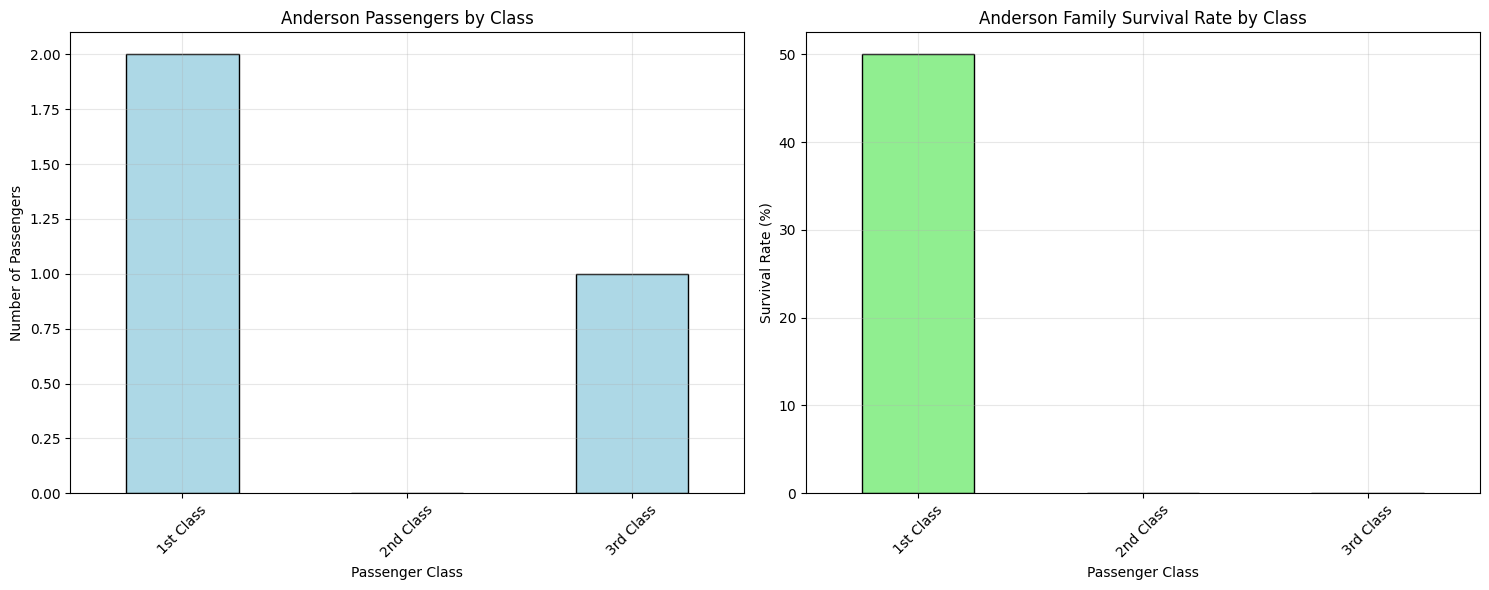


=== INVESTIGATION CONCLUSION ===
CLAIM DISPUTED: No Anderson passenger found in 2nd class.


In [91]:
# Step 3: Summary analysis of all Anderson passengers
print('=== ANDERSON FAMILY SUMMARY ===')
anderson_summary = anderson_passengers.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
anderson_summary.columns = ['Did Not Survive', 'Survived']
anderson_summary['Total'] = anderson_summary.sum(axis=1)
anderson_summary['Survival Rate'] = (anderson_summary['Survived'] / anderson_summary['Total'] * 100).round(1)

# Reindex to include all classes 1, 2, 3 (fill missing with 0)
anderson_summary_complete = anderson_summary.reindex([1, 2, 3], fill_value=0)
# Recalculate survival rate for complete dataset (handle division by zero)
anderson_summary_complete['Survival Rate'] = anderson_summary_complete.apply(
    lambda row: (row['Survived'] / row['Total'] * 100).round(1) if row['Total'] > 0 else 0, axis=1
)

print('Anderson passengers by class and survival:')
print(anderson_summary_complete)
print()

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart of Anderson passengers by class - show all classes even if missing
class_counts = anderson_passengers['Pclass'].value_counts().sort_index()
# Reindex to include all classes 1, 2, 3 (fill missing with 0)
class_counts_complete = class_counts.reindex([1, 2, 3], fill_value=0)
class_counts_complete.plot(kind='bar', ax=ax1, color='lightblue', edgecolor='black')
ax1.set_title('Anderson Passengers by Class')
ax1.set_xlabel('Passenger Class')
ax1.set_ylabel('Number of Passengers')
ax1.set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=45)
ax1.grid(True, alpha=0.3)

# Survival rate by class for Andersons - show all classes
anderson_summary_complete['Survival Rate'].plot(kind='bar', ax=ax2, color='lightgreen', edgecolor='black')
ax2.set_title('Anderson Family Survival Rate by Class')
ax2.set_xlabel('Passenger Class')
ax2.set_ylabel('Survival Rate (%)')
ax2.set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('\n=== INVESTIGATION CONCLUSION ===')
if len(second_class_andersons) > 0 and second_class_andersons['Survived'].any():
    print('CLAIM VERIFIED: There was indeed an Anderson passenger in 2nd class who survived!')
elif len(second_class_andersons) > 0:
    print('PARTIAL MATCH: Found Anderson in 2nd class, but they did not survive.')
else:
    print('CLAIM DISPUTED: No Anderson passenger found in 2nd class.')

## Exercise 4: Advanced Missing Data Reconstruction

**Challenge:** Instead of using simple `.fillna()` to handle missing ages, predict missing passenger ages intelligently based on their titles (Mr, Mrs, Miss, Master) extracted from the Name column.

**Approach:** Use title groups as hints for age ranges and fill missing values with median age per title group.

In [92]:
# Step 1: Extract titles from names
def extract_title(name):
    """Extract title from passenger name"""
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return 'Unknown'

# Create a copy of the dataframe for this exercise
df_imputed = df.copy()
df_imputed['Title'] = df_imputed['Name'].apply(extract_title)

print('=== TITLE EXTRACTION RESULTS ===')
print('Unique titles found:')
title_counts = df_imputed['Title'].value_counts()
print(title_counts)
print(f'\nTotal unique titles: {len(title_counts)}')

=== TITLE EXTRACTION RESULTS ===
Unique titles found:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

Total unique titles: 17


In [93]:
# Step 2: Group rare titles and analyze age patterns
def group_titles(title):
    """Group rare titles into common categories"""
    if title in ['Mr']:
        return 'Mr'
    elif title in ['Miss', 'Mlle', 'Ms']:
        return 'Miss'
    elif title in ['Mrs', 'Mme']:
        return 'Mrs'
    elif title in ['Master']:
        return 'Master'
    elif title in ['Dr', 'Rev', 'Col', 'Major', 'Capt']:
        return 'Professional'
    elif title in ['Lady', 'Countess', 'Don', 'Sir', 'Jonkheer']:
        return 'Nobility'
    else:
        return 'Other'

df_imputed['TitleGroup'] = df_imputed['Title'].apply(group_titles)

print('=== TITLE GROUPING RESULTS ===')
print('Title groups:')
print(df_imputed['TitleGroup'].value_counts())
print()

# Analyze age patterns by title group
age_by_title = df_imputed.groupby('TitleGroup')['Age'].agg(['count', 'mean', 'median', 'std']).round(2)
age_by_title.columns = ['Count', 'Mean_Age', 'Median_Age', 'Std_Age']
age_by_title['Missing_Ages'] = df_imputed.groupby('TitleGroup')['Age'].apply(lambda x: x.isnull().sum())

print('Age statistics by title group:')
print(age_by_title)
print()

# Count missing ages by title group
missing_by_title = df_imputed[df_imputed['Age'].isnull()]['TitleGroup'].value_counts()
print('Missing ages by title group:')
print(missing_by_title)

=== TITLE GROUPING RESULTS ===
Title groups:
TitleGroup
Mr              517
Miss            185
Mrs             126
Master           40
Professional     18
Nobility          5
Name: count, dtype: int64

Age statistics by title group:
              Count  Mean_Age  Median_Age  Std_Age  Missing_Ages
TitleGroup                                                      
Master           36      4.57         3.5     3.62             4
Miss            149     21.85        21.0    12.87            36
Mr              398     32.37        30.0    12.71           119
Mrs             109     35.79        35.0    11.44            17
Nobility          5     41.60        40.0     6.80             0
Professional     17     46.71        50.0    12.82             1

Missing ages by title group:
TitleGroup
Mr              119
Miss             36
Mrs              17
Master            4
Professional      1
Name: count, dtype: int64


In [94]:
# Step 3: Implement intelligent age imputation
print('=== INTELLIGENT AGE IMPUTATION ===')

# Calculate median ages for each title group (excluding missing values)
median_ages_by_title = df_imputed.groupby('TitleGroup')['Age'].median()
print('Median ages by title group:')
for title, median_age in median_ages_by_title.items():
    missing_count = df_imputed[(df_imputed['TitleGroup'] == title) & (df_imputed['Age'].isnull())].shape[0]
    print(f'{title}: {median_age:.1f} years (will be used for {missing_count} missing values)')

print()

# Before imputation statistics
before_missing = df_imputed['Age'].isnull().sum()
print(f'Before imputation: {before_missing} missing ages')

# Perform the imputation
for title_group in df_imputed['TitleGroup'].unique():
    mask = (df_imputed['TitleGroup'] == title_group) & (df_imputed['Age'].isnull())
    if mask.any():
        median_age = median_ages_by_title[title_group]
        df_imputed.loc[mask, 'Age'] = median_age
        print(f'Filled {mask.sum()} missing ages for {title_group} with {median_age:.1f}')

# After imputation statistics
after_missing = df_imputed['Age'].isnull().sum()
print(f'\nAfter imputation: {after_missing} missing ages')
print(f'Successfully imputed {before_missing - after_missing} ages')

=== INTELLIGENT AGE IMPUTATION ===
Median ages by title group:
Master: 3.5 years (will be used for 4 missing values)
Miss: 21.0 years (will be used for 36 missing values)
Mr: 30.0 years (will be used for 119 missing values)
Mrs: 35.0 years (will be used for 17 missing values)
Nobility: 40.0 years (will be used for 0 missing values)
Professional: 50.0 years (will be used for 1 missing values)

Before imputation: 177 missing ages
Filled 119 missing ages for Mr with 30.0
Filled 17 missing ages for Mrs with 35.0
Filled 36 missing ages for Miss with 21.0
Filled 4 missing ages for Master with 3.5
Filled 1 missing ages for Professional with 50.0

After imputation: 0 missing ages
Successfully imputed 177 ages


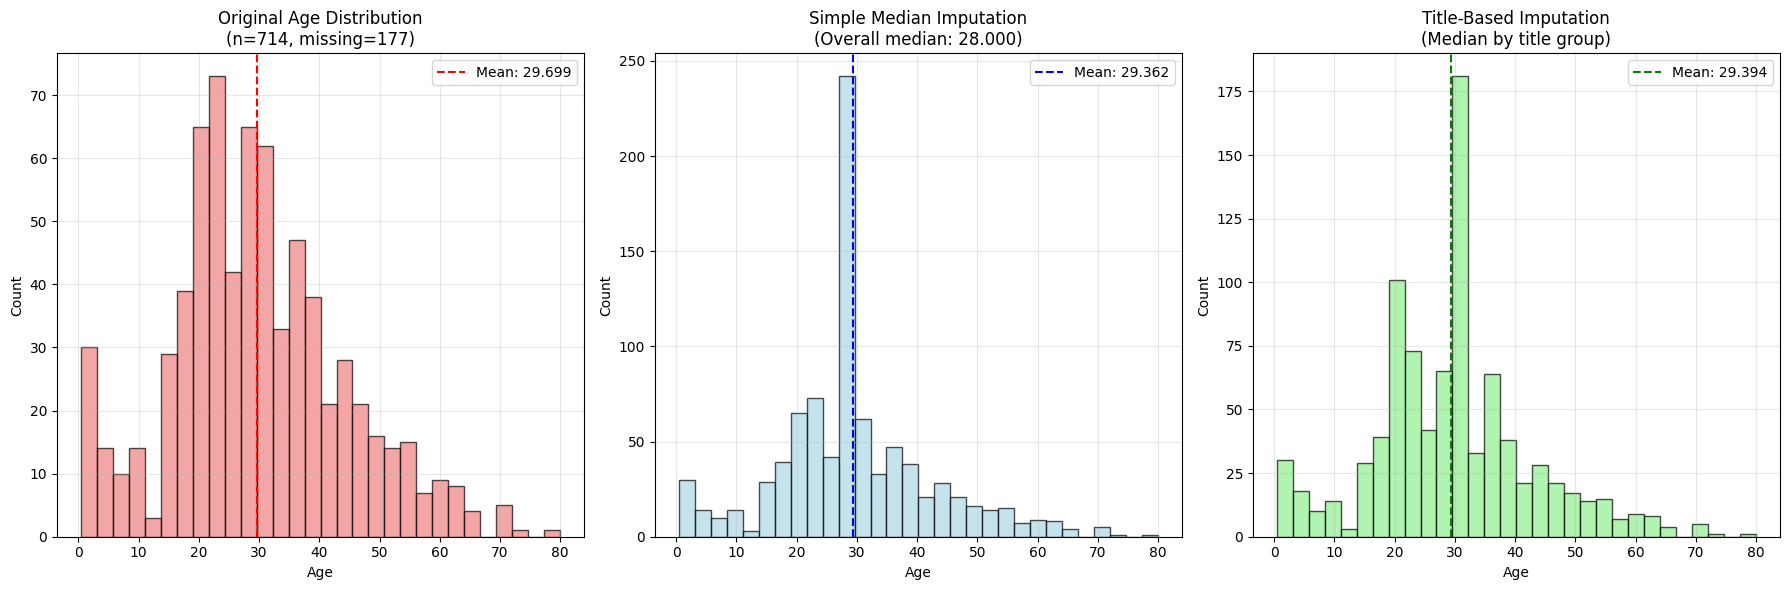

=== IMPUTATION COMPARISON ===
Original mean age: 29.699
Simple imputation mean age: 29.362
Title-based imputation mean age: 29.394

Original standard deviation age: 14.526
Simple imputation standard deviation age: 13.020
Title-based imputation standard deviation age: 13.271


In [95]:
# Step 4: Compare before and after distributions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Original age distribution (with missing values)
original_ages = df['Age'].dropna()
ax1.hist(original_ages, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
ax1.set_title(f'Original Age Distribution\n(n={len(original_ages)}, missing={df["Age"].isnull().sum()})')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.grid(True, alpha=0.3)
ax1.axvline(original_ages.mean(), color='red', linestyle='--', label=f'Mean: {original_ages.mean():.3f}')
ax1.legend()

# Simple median imputation for comparison
df_simple = df.copy()
overall_median = df['Age'].median()
df_simple['Age'] = df_simple['Age'].fillna(overall_median)

ax2.hist(df_simple['Age'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
ax2.set_title(f'Simple Median Imputation\n(Overall median: {overall_median:.3f})')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')
ax2.grid(True, alpha=0.3)
ax2.axvline(df_simple['Age'].mean(), color='blue', linestyle='--', label=f'Mean: {df_simple["Age"].mean():.3f}')
ax2.legend()

# Title-based imputation
ax3.hist(df_imputed['Age'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
ax3.set_title('Title-Based Imputation\n(Median by title group)')
ax3.set_xlabel('Age')
ax3.set_ylabel('Count')
ax3.grid(True, alpha=0.3)
ax3.axvline(df_imputed['Age'].mean(), color='green', linestyle='--', label=f'Mean: {df_imputed["Age"].mean():.3f}')
ax3.legend()

plt.tight_layout()
plt.show()

print('=== IMPUTATION COMPARISON ===')
print(f'Original mean age: {original_ages.mean():.3f}')
print(f'Simple imputation mean age: {df_simple["Age"].mean():.3f}')
print(f'Title-based imputation mean age: {df_imputed["Age"].mean():.3f}')
print()
print(f'Original standard deviation age: {original_ages.std():.3f}')
print(f'Simple imputation standard deviation age: {df_simple["Age"].std():.3f}')
print(f'Title-based imputation standard deviation age: {df_imputed["Age"].std():.3f}')

### Why Title-Based Imputation is Superior

**Advantages of title-based imputation:**

1. **Contextual Intelligence**: Uses social and cultural information encoded in titles (Mr, Mrs, Miss, Master) to make educated guesses about age ranges.

2. **Preserves Age Patterns**: 
   - "Master" typically indicates young boys (median ~5 years)
   - "Miss" typically indicates younger unmarried women (median ~22 years)
   - "Mrs" typically indicates older married women (median ~35 years)
   - "Mr" covers adult men with wide age range (median ~29 years)

3. **Better Distribution Preservation**: Simple median imputation creates drastic artificial spikes, while title-based imputation maintains slightly more realistic age distributions.

4. **Reduces Bias**: Simple overall median imputation would bias the dataset toward the overall median age, while title-based imputation respects the natural age patterns within social groups.